In [2]:
import requests, re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml

In [3]:
#Get list 

import warnings
warnings.filterwarnings('ignore')


def CharacterList(url):
    websiteURL =  requests.get(url)
    soup = BeautifulSoup(websiteURL.text)
    characterGallery = soup.find_all('div',{'class':'category-page__members'})
    characters = []

    for character in characterGallery:

        images = character.findAll("img")
        for image in images:
            try:
                characterName = image.get("alt")
            except:
                pass

            characters.append(characterName)

    return characters


ListOfCharacter = CharacterList("https://gossipgirl.fandom.com/wiki/Category:Characters")
#ListOfCharacter

ListCharachters   = set(ListOfCharacter)

print("number of nodes: ", len(ListCharachters))




number of nodes:  110


In [4]:
toRemove = ["relationship", 'Gossip', 'Season', 'Tripp\xa0Vanderbilt','Social Media', 'Breakfast', 'Melanie91' ]

toRemove = set(toRemove)
listCharachters = [c for c in ListCharachters if not any(r in toRemove for r in c.split())]

print("number of nodes after stripping: ", len(listCharachters))


number of nodes after stripping:  94


In [5]:

DF = pd.DataFrame(columns=['Character', 'Edges/relationships','size/episodes', 'gender'])
DF['Character'] = listCharachters





In [12]:

def getRelationship(nodes):
    
    for i, charachter in enumerate(nodes):
        url =  requests.get(f"https://gossipgirl.fandom.com/wiki/{charachter}")
        soup = BeautifulSoup(url.text)
        
        try:
            infoBox = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            infoBox2 = soup.findAll('section',{'class':'pi-item pi-group pi-border-color'})[1]
            infoBox
            relationships = infoBox.findAll('div',{'class':'pi-data-value pi-font'})

            relationshipsNames = re.findall('title="(.*?)"',str(relationships))

            RelationList = []
            relationshipNames = set(relationshipsNames)
            for name in relationshipNames:
                if name in ListCharachters:
                    RelationList.append(name) 
        except: 
            RelationList = []

        DF['Edges/relationships'][i] = RelationList
        DF['size/episodes'][i] = len(RelationList)

def getGender():
    websiteURL =  requests.get("https://gossipgirl.fandom.com/wiki/Category:Females")
    soup = BeautifulSoup(websiteURL.text)
    FemaleGallery = soup.find_all('div',{'class':'category-page__members'})
    females = []

    for female in FemaleGallery:

        images = female.findAll("img")
        for image in images:
            try:
                characterName = image.get("alt")
            except:
                pass

            females.append(characterName)

    for i  in range(len(listCharachters)):
        if listCharachters[i] in females:
            DF['gender'][i] = 'pink'
        else: 
            DF['gender'][i] = 'grey'
            

getGender()
DF
 



,Character,Edges/relationships,size/episodes,gender
0,CeCe Rhodes,"[Chuck Bass, Carol Rhodes, Rick Rhodes, Serena...",9,pink
1,Helena Bergmann,[Obie Bergmann IV],1,pink
2,Waldorf penthouse,[],0,grey
3,Howard Archibald,"[Nate Archibald, Tripp van der Bilt, Anne Arch...",4,grey
4,Catherine Beaton,"[Nate Archibald, Vanessa Abrams, Marcus Beaton]",3,pink
...,...,...,...,...
89,Philip Becker,[Georgina Sparks],1,grey
90,Alison Humphrey,"[Dan Humphrey, Serena van der Woodsen, Rufus H...",5,pink
91,Hot lifeguard,[Serena van der Woodsen],1,grey
92,Julien Calloway,"[Monet de Haan, Gossip Girl (character), Max W...",7,pink


[1820, 220, 20, 820, 620, 2420, 420, 4020, 1020, 4220, 820, 20, 820, 3820, 4020, 420, 820, 220, 1420, 820, 1220, 1220, 1420, 420, 1220, 620, 220, 1620, 820, 220, 2420, 3020, 2020, 20, 820, 1220, 5820, 620, 620, 620, 1220, 1020, 620, 1420, 2420, 2420, 820, 3820, 620, 1420, 1020, 220, 420, 20, 820, 620, 1820, 1020, 1020, 2020, 1820, 420, 2220, 20, 2420, 820, 420, 20, 2820, 2020, 820, 1020, 820, 1020, 420, 1020, 220, 1020, 620, 620, 1020, 20, 420, 20, 20, 220, 620, 420, 820, 220, 1020, 220, 1420, 420]


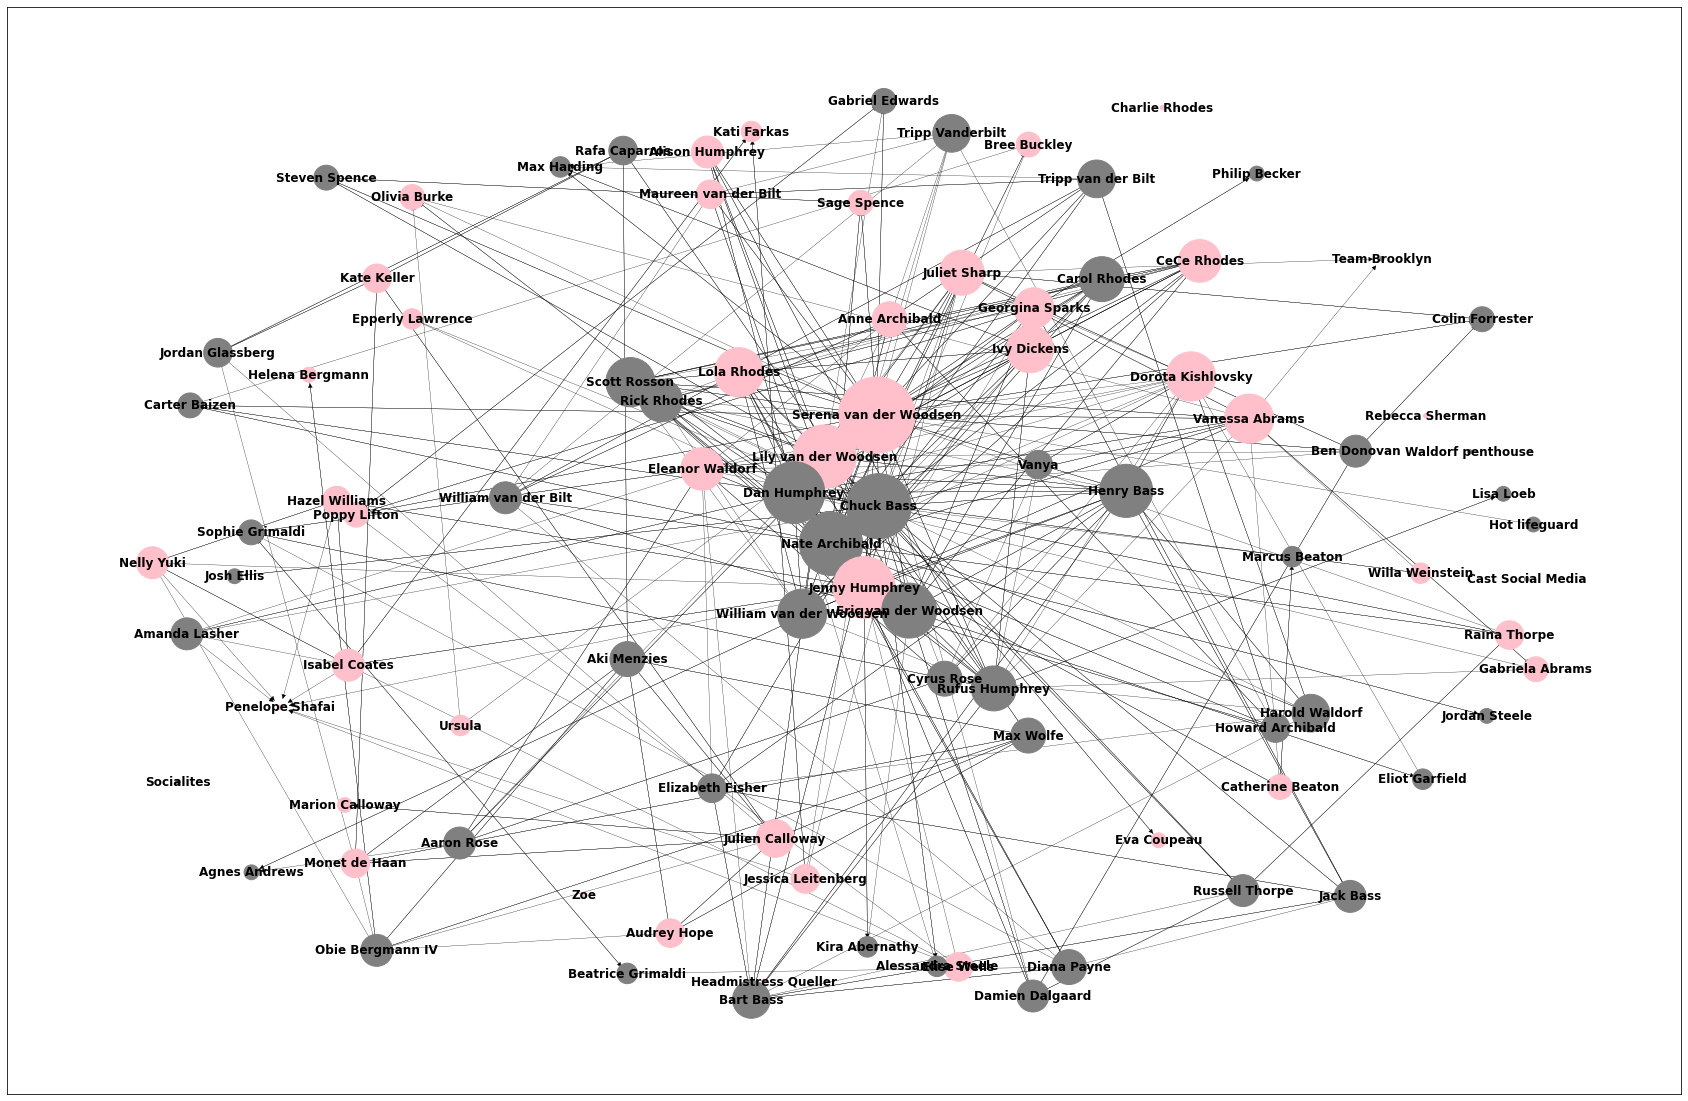

In [13]:
## create network with nodes and edges
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2

#list of edges

edgeList = []
for i in range(len(listCharachters)):
    for j in DF['Edges/relationships'][i]:
        if(j in listCharachters):
            edgeList.append((listCharachters[i],j))


fig, ax = plt.subplots()
fig.set_size_inches(30,20)

G = nx.DiGraph()

G.add_nodes_from(listCharachters)
#print(G.nodes)
#print(len(edgeList))

G.add_edges_from(edgeList)


sizes = DF['size/episodes']
gender = DF['gender']
nodesizes = [int(s)*200+20 for s in sizes]
print(nodesizes)




pos = nx.spring_layout(G, k=6*1/np.sqrt(len(G.nodes())), iterations=20)
nx.draw_networkx_nodes(G, pos=pos, node_size = nodesizes, node_color= gender )
nx.draw_networkx_edges(G,pos=pos, width=0.3)
nx.draw_networkx_labels(G,pos=pos, font_weight='bold',font_color='black')
plt.show()



#G.add_edges_from(edgeList)
#nx.draw(G, with_labels=True, font_weight='light', font_color='black', width=1, node_size=10,)


In [49]:
# Info. graph 

print("Number of edges in the directed graph is", G.number_of_edges())

H = G.to_undirected()

print("Number of edges in the Undirected graph is", H.number_of_edges())

SortedG = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("The ten nodes with the highest degree is ",  SortedG[:9] )

Number of edges in the directed graph is 520
Number of edges in the Undirected graph is 312
The ten nodes with the highest degree is  [('Serena van der Woodsen', 68), ('Chuck Bass', 52), ('Dan Humphrey', 44), ('Lily van der Woodsen', 42), ('Nate Archibald', 42), ('Jenny Humphrey', 36), ('Eric van der Woodsen', 31), ('Henry Bass', 29), ('Rufus Humphrey', 25)]


In [50]:
# color edges